In [96]:
import pandas as pd
import numpy as np


In [97]:
df=pd.read_csv("heart_cleveland_upload.csv")
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     

In [98]:
from sklearn.impute import SimpleImputer
#This is done to find the columns containing the numbers
def clean_with_sklearn(df):
    df_copy=df.copy()
    numeric_col=df_copy.select_dtypes(include=[np.number]).columns
    print(numeric_col)
#This is done to find the missing value in the number col 
    missing_count=df_copy[numeric_col].isnull().sum().sum()
    print(missing_count)
#This prints the cleaned data
    if missing_count>0:
        imputer=SimpleImputer(strategy='median')
        df_copy[numeric_col]=imputer.fit_transform(df_copy[numeric_col])
        print(df_copy)
    else:
        print("No missing values found!")
        
    return df_copy
     
df_cleaned=clean_with_sklearn(df)
print("Cleaning completed")
    

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')
0
No missing values found!
Cleaning completed


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
print("THe shape of the data is ",df.shape)
print('The columns of the data are',df.columns)
print("First 5 rows are",df.head())
print("Average age with heart disease:",df[df['condition']==1]['age'].mean())
print("Average age with no heart disease:",df[df['condition']==0]['age'].mean())

THe shape of the data is  (297, 14)
The columns of the data are Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')
First 5 rows are    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
Average age with heart disease: 56.75912408759124
Average age with no heart disease: 52.64375


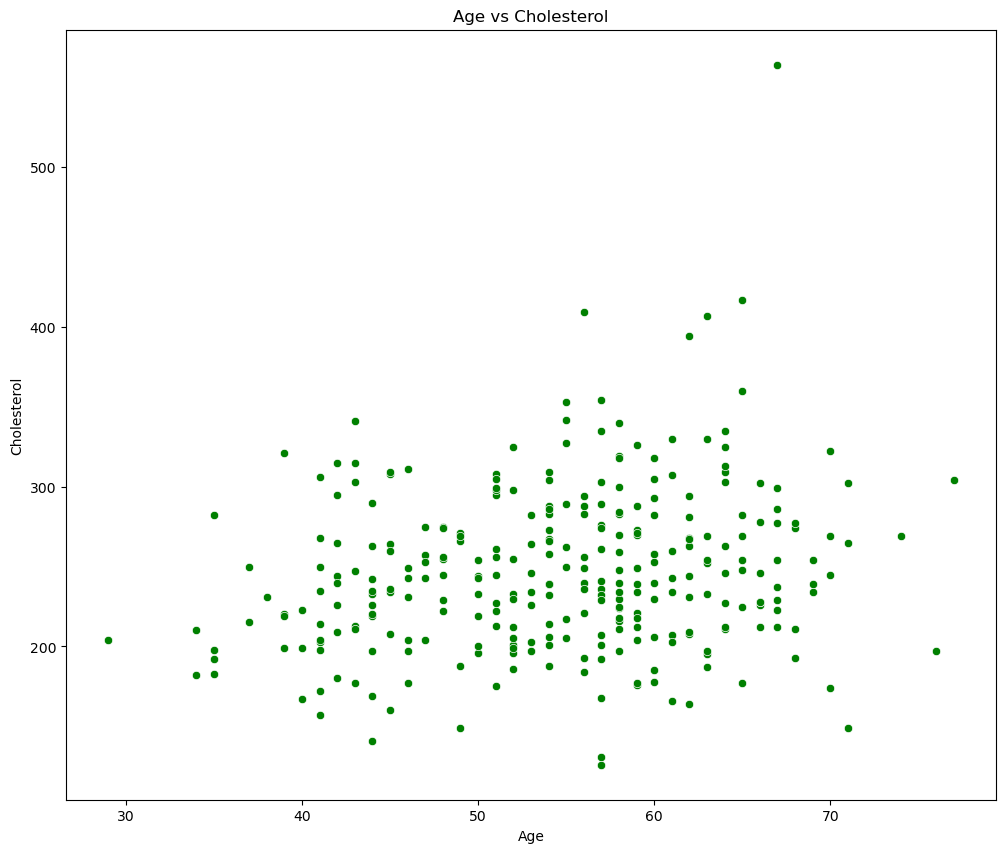

In [100]:
fig1, ax1 = plt.subplots(figsize=(12, 10))
sns.scatterplot(data=df, color='green', x='age', y='chol', ax=ax1)
ax1.set_title('Age vs Cholesterol')
ax1.set_xlabel('Age')
ax1.set_ylabel('Cholesterol')
plt.show()


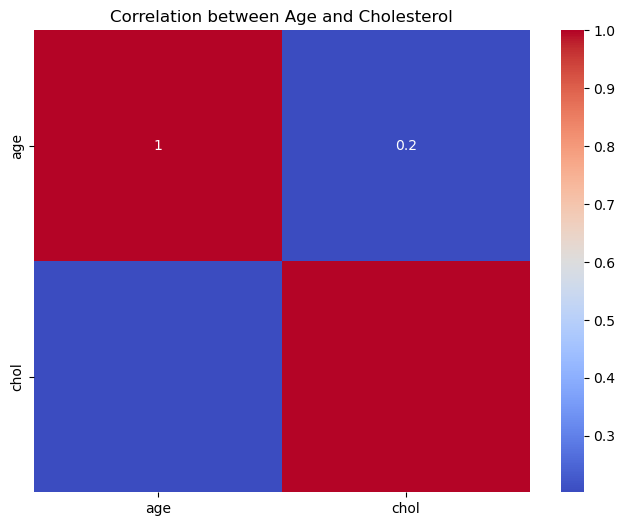

In [101]:
corr_matrix = df[['age', 'chol']].corr()
fig2, ax2 = plt.subplots(figsize=(8, 6))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', ax=ax2)
ax2.set_title('Correlation between Age and Cholesterol')
plt.show()

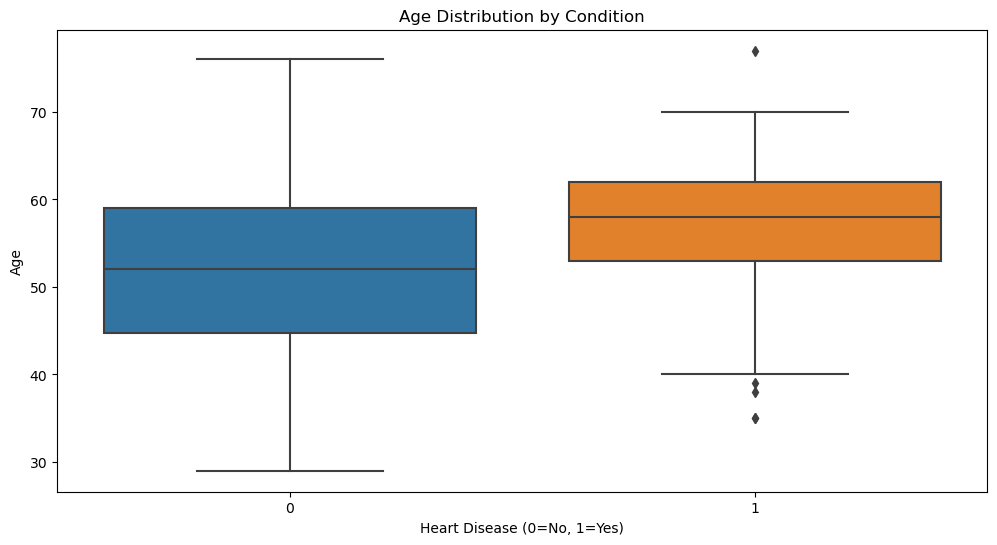

In [102]:
# 3. Boxplot - Age Distribution by Condition
fig3, ax3 = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, x='condition', y='age', ax=ax3)
ax3.set_title('Age Distribution by Condition')
ax3.set_xlabel('Heart Disease (0=No, 1=Yes)')
ax3.set_ylabel('Age')
plt.show()

In [103]:
X=df.drop('condition',axis=1)
Y=df['condition']
print("Features (X) shape:", X.shape)
print("Target (y) shape:", Y.shape)
print("First few rows of features:")
print(X.head())
print("\nFirst few target values:")
print(Y.head())

Features (X) shape: (297, 13)
Target (y) shape: (297,)
First few rows of features:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  
0   1     0  
1   2     0  
2   0     0  
3   1     0  
4   0     0  

First few target values:
0    0
1    0
2    0
3    1
4    0
Name: condition, dtype: int64


In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

print(f"Training set size: X_train = {X_train.shape}, Y_train = {Y_train.shape}")
print(f"Testing set size: X_test = {X_test.shape}, Y_test = {Y_test.shape}")

Training set size: X_train = (237, 13), Y_train = (237,)
Testing set size: X_test = (60, 13), Y_test = (60,)


In [105]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

print("Features scaled.")

Features scaled.


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Train Logistic Regression (use scaled features)
print("--- Training Logistic Regression ---")
lr_model = LogisticRegression(random_state=42, max_iter=1000) 
lr_model.fit(X_train_scaled, Y_train)
print("Logistic Regression model trained.")

print("\n--- Training Decision Tree ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train) 
print("Decision Tree model trained.")

--- Training Logistic Regression ---
Logistic Regression model trained.

--- Training Decision Tree ---
Decision Tree model trained.


In [107]:
from sklearn.metrics import accuracy_score

y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1] 

y_pred_dt = dt_model.predict(X_test) 
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1] 

print("Predictions made for both models.")

Predictions made for both models.


In [108]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr_lr,tpr_lr,_=roc_curve(Y_test,y_pred_proba_lr)
auc_lr=auc(fpr_lr,tpr_lr)
fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_pred_proba_dt)
auc_dt = auc(fpr_dt, tpr_dt)


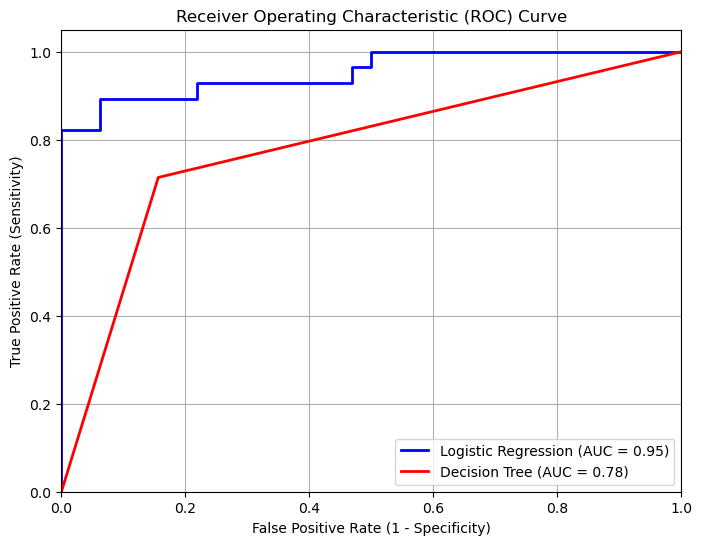

In [109]:
plt.figure(figsize=(8,6))

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lr:.2f})')

plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [110]:

from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(Y_test, y_pred_lr)
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
print(accuracy_lr)
print(accuracy_dt)

0.9166666666666666
0.7833333333333333


In [111]:
print("LogisticRegression Coefficients")
feature_names=df.drop('condition',axis=1).columns
coefficient=lr_model.coef_[0]
coef_df=pd.DataFrame({'Feature':feature_names,'Coefficient':coefficient})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)
print(coef_df_sorted)
print("-" * 30)

LogisticRegression Coefficients
     Feature  Coefficient  Abs_Coefficient
11        ca     1.052519         1.052519
12      thal     0.575219         0.575219
2         cp     0.477045         0.477045
7    thalach    -0.475278         0.475278
8      exang     0.447403         0.447403
9    oldpeak     0.417659         0.417659
1        sex     0.381887         0.381887
3   trestbps     0.305043         0.305043
5        fbs    -0.277253         0.277253
10     slope     0.255744         0.255744
4       chol     0.159730         0.159730
6    restecg     0.131578         0.131578
0        age    -0.093128         0.093128
------------------------------


In [112]:
# --- 2. Decision Tree Feature Importance ---
print("\n--- Decision Tree Feature Importance ---")
importances = dt_model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df_sorted)
print("-" * 30)


--- Decision Tree Feature Importance ---
     Feature  Importance
2         cp    0.296026
9    oldpeak    0.162500
10     slope    0.081394
0        age    0.076946
1        sex    0.075676
11        ca    0.075506
7    thalach    0.072684
3   trestbps    0.071311
4       chol    0.060969
12      thal    0.026989
5        fbs    0.000000
6    restecg    0.000000
8      exang    0.000000
------------------------------


In [113]:
# --- 3. Correlation with Target ---
print("\n--- Feature Correlation with Target ---")
correlations = df.corr()['condition'].drop('condition')
correlations_df = pd.DataFrame({'Feature': correlations.index, 'Correlation': correlations.values})
correlations_df['Abs_Correlation'] = correlations_df['Correlation'].abs()
correlations_df_sorted = correlations_df.sort_values(by='Abs_Correlation', ascending=False)
print(correlations_df_sorted)
print("-" * 30)


--- Feature Correlation with Target ---
     Feature  Correlation  Abs_Correlation
12      thal     0.520516         0.520516
11        ca     0.463189         0.463189
9    oldpeak     0.424052         0.424052
7    thalach    -0.423817         0.423817
8      exang     0.421355         0.421355
2         cp     0.408945         0.408945
10     slope     0.333049         0.333049
1        sex     0.278467         0.278467
0        age     0.227075         0.227075
6    restecg     0.166343         0.166343
3   trestbps     0.153490         0.153490
4       chol     0.080285         0.080285
5        fbs     0.003167         0.003167
------------------------------


from sklearn.metrics import accuracy_score

# Accuracy for Logistic Regression
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Accuracy for Decision Tree
accuracy_dt = accuracy_score(Y_test, Y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")